Install MNE library: https://martinos.org/mne/stable/getting_started.html

In [8]:
import mne
from pathlib import Path
import matplotlib.pyplot as plt

# 1_month_aEEG

The 1-month EEG files can be loaded with MNE, but most of the data points are just zero. Also MNE says it has two channels, while according to Abbie it should be only one channel?

In [81]:
ROOT = Path('/Users/xhan/Dropbox/raw_eeg_data/')
fp = ROOT/'01_mo_aEEG/EDF/A1-1-1.edf'
# fp = ROOT/'12_mo/EDF/20170224151058_B23-1-1.edf'
raw = mne.io.read_raw_edf(str(fp), preload=True)

Extracting EDF parameters from /Users/xhan/Dropbox/raw_eeg_data/01_mo_aEEG/EDF/A1-1-1.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ... 101249.250 secs...


<ipython-input-81-2ac9815e0fc5>:4: RuntimeWarning: 1 channel names are too long, have been truncated to 15 characters:
['EDF Annotations-1']
  raw = mne.io.read_raw_edf(str(fp), preload=True)


In [82]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EDF Annotations, STI 014
    chs : list | 2 items (STIM: 2)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 0.6666666666666666 Hz
    meas_date : tuple | 2016-06-27 15:06:12 GMT
    nchan : int | 2
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1.3333333333333333 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout 

In [83]:
raw.info["ch_names"]

['EDF Annotations', 'STI 014']

In [84]:
raw._data.shape

(2, 135000)

In [85]:
raw._data

array([[12331.,  5140.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [67]:
%matplotlib qt5

<IPython.core.display.Javascript object>


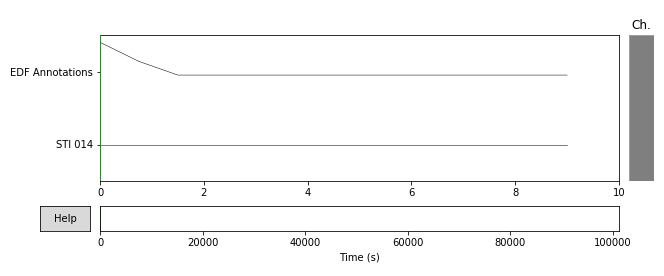

<IPython.core.display.Javascript object>


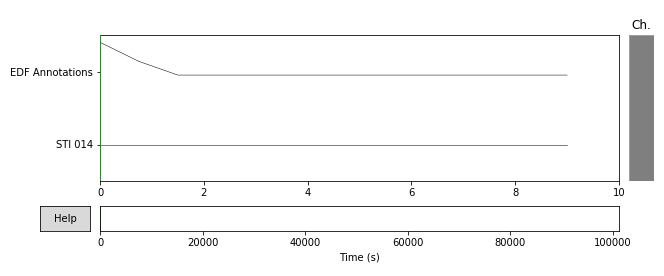

In [87]:
mne.viz.plot_raw(raw, duration=10.0, start=0.0, n_channels=len(raw.info["ch_names"]))

# Broken files

`
error in: /Users/xhan/Dropbox/raw_eeg_data/12_mo/EDF/20170310125824_B9-1-2.edf 
 the file is not EDF(+) or BDF(+) compliant (Number of Datarecords)
error in: /Users/xhan/Dropbox/raw_eeg_data/12_mo/EDF/20160909104906_B20-1-1.edf 
 the file is not EDF(+) or BDF(+) compliant (Number of Datarecords)
error in: /Users/xhan/Dropbox/raw_eeg_data/12_mo/EDF/20170310125545_B9-1-2.edf 
 the file is not EDF(+) or BDF(+) compliant (Number of Datarecords)
`

The above three files cannot be opened with MNE as well. I think they are just broken.

# Other EEG files

In [92]:
ROOT = Path('/Users/xhan/Dropbox/raw_eeg_data/')
# fp = ROOT/'01_mo_aEEG/EDF/A40-1-1(1mo).edf'
fp = ROOT/'12_mo/EDF/20170224151058_B23-1-1.edf'
raw = mne.io.read_raw_edf(str(fp), preload=True)

Extracting EDF parameters from /Users/xhan/Dropbox/raw_eeg_data/12_mo/EDF/20170224151058_B23-1-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 298999  =      0.000 ...   597.998 secs...


In [93]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, C3, C4, T7, T8, O1, STI 014
    chs : list | 8 items (EEG: 7, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2017-02-24 15:10:58 GMT
    nchan : int | 8
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : Non

In [94]:
# one weird channel name
raw.info["ch_names"]

['Fp1', 'Fp2', 'C3', 'C4', 'T7', 'T8', 'O1', 'STI 014']

In [95]:
raw._data.shape

(8, 299000)

In [96]:
raw._data

array([[ -68503.08995193,  -63502.8610666 ,  -54502.44907301, ...,
        -206509.407187  , -181508.26276036, -157507.16411078],
       [ -81503.68505379,  -82503.73083085,  -74503.36461433, ...,
        -211509.63607233, -192508.76630808, -173507.89654383],
       [ -50502.26596475,  -47502.12863355,  -39501.76241703, ...,
        -174507.9423209 , -152506.93522545, -127505.79079881],
       ...,
       [  -4500.16021973,    6500.34332799,   10500.52643626, ...,
        -118505.37880522, -100504.55481804,  -77503.50194552],
       [  22501.07576104,   21501.02998398,   26501.25886931, ...,
        -132506.01968414, -109504.96681163,  -85503.86816205],
       [  53502.        ,   56502.        ,   68503.        , ...,
          34568.        ,   54569.        ,   74570.        ]])

In [97]:
%matplotlib qt5
plt.rcParams['figure.figsize'] = [10, 4]

<IPython.core.display.Javascript object>


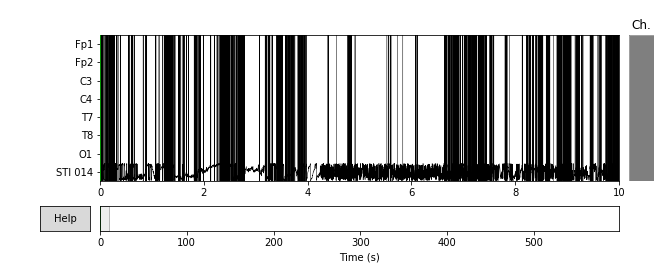

<IPython.core.display.Javascript object>


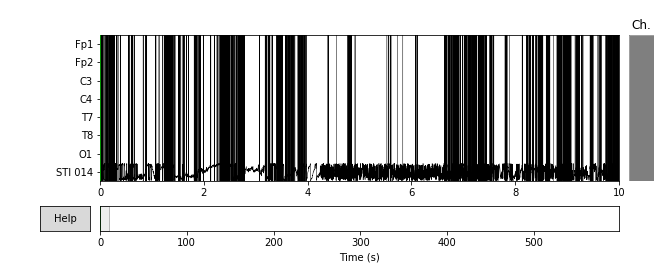

In [98]:
mne.viz.plot_raw(raw, duration=10.0, start=0.0, n_channels=len(raw.info["ch_names"]))